# Régression linéaire du projet "New Car"


## Analyse exploratoire des données


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Introduction

Dans ce notebook, nous allons explorer un ensemble de données du site web de voitures CarDekho, qui contient des informations sur une grande quantité de voitures. L'objectif est de prédire le prix d'une voiture en utilisant une méthode de machine learning, la régression linéaire.

L'ensemble du dataset contient les informations suivantes pour chaque voiture :

- Car_name : définit le nom de la voiture.
- Year : définit l’année de fabrication de la voiture.
- Selling_Price : définit le prix auquel le propriétaire souhaite
vendre la voiture (votre target).
- Present_Price : définit le prix de la voiture départ-usine de la
voiture.
- Kms_Driver : définit la distance parcourue en km par la voiture.
- Fuel_Type : définit le type de carburant de la voiture.
- Seller_type : définit si le vendeur est un revendeur ou un
particulier.
- Transmission : définit si la boîte à vitesse de la voiture est
manuelle ou automatique.
- Owner : définit le nombre d'anciens propriétaires de la voiture.

Lien du dataset : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Dans ce notebook, nous entreprendrons les étapes suivantes :

- Collecte et analyse du dataset
- Nettoyage des données
- Visualisation

### Collecte et analyse du dataset

In [76]:
df = pd.read_csv('carData.csv')

In [77]:
df.shape

(301, 9)

In [78]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [79]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [80]:
df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [82]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [83]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [84]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

Parmis les données catégorielles nous remarquons que Transmission et Seller_Type possèdent 2 observations différentes tandis que Fuel_Type possède 3 observations différentes. Nous transformerons ces données en variables quantitatives par la suite afin d'étudier les corrélations avec les autres variables.

#### Statistiques descriptives

In [85]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Nettoyage des données

#### Suppression des lignes et colonnes et transformation des données

In [86]:
num_of_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(299, 9)

Nous avons 2 lignes doublons et nous allons donc les supprimer.


Ensuite, nous allons supprimer la colonne « Car_Name » car notre variable cible est le prix de vente de la voiture. Dans ce cas, « Selling_Price » et « Present_Price » sont nos variables les plus importantes avec les autres variables numériques.

In [87]:
df.drop('Car_Name', axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Nous allons transformer nos Selling_Price et Present_Price qui sont en 'k' en valeurs numériques.

In [88]:
df['Selling_Price'] = df['Selling_Price'].replace(',', '').astype(float) * 1000
df['Present_Price'] = df['Present_Price'].replace(',', '').astype(float) * 1000

Nous souhaitons ajouter une variable "Nb_Of_Year" qui comportera l'âge de la voiture, ce sera plus intérressant pour évaluer la corrélation avec le prix de vente.

Pour cela, nous allons créer une varribale "Current_Year" qui contiendra l'année la plus récente de notre dataset, et sera soustrait à l'année pour obtenir l'âge de la voiture :

Current_Year - Year = Nb_Of_Year

In [89]:
current_year = df["Year"].max()
df['Nb_Of_Year'] = current_year - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nb_Of_Year
0,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0,4
1,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0,5
2,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0,1
3,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0,7
4,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0,4


Puis, nous supprimons les variables 'Year' et 'Current_Year'.

In [90]:
df.drop(['Year'], axis = 1, inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nb_Of_Year
0,3350.0,5590.0,27000,Petrol,Dealer,Manual,0,4
1,4750.0,9540.0,43000,Diesel,Dealer,Manual,0,5
2,7250.0,9850.0,6900,Petrol,Dealer,Manual,0,1
3,2850.0,4150.0,5200,Petrol,Dealer,Manual,0,7
4,4600.0,6870.0,42450,Diesel,Dealer,Manual,0,4


#### Modification des variables catégorielles en variables quantitatives

Nous avons utilisé la méthode get_dummies de pandas afin de transformer nos données catégorielles en données quantitatives. On a donc 4 nouvelles colonnes qui nous permettent d'identifier nos nouvelles variables.

Dans notre cas nous avons Fuel_Type_Diesel & Fuel_Type_Petrol en 0 ou 1, lorsque la valeur est 0 est les 2 colonnes il s'agit de la 3ème observation 'CNG'.

Pour ce qui est du Seller_Type nous avons une nouvelle colonne Seller_Type_Individual qui a aussi des valeurs 0 & 1. Lorsque la valeur est de 0 le Seller_Type est un 'Dealer' et lorsque la valeur est de 1 le Seller_Type est un 'Individual'.

Pour la dernière colonne il s'agit de la Transmission. Lorsque la Transmission est 'Manual' on retrouve 1 dans la colonne Transmission_Manual et lorsque la transmission est 'Automatic' on a une valeur de 0.

In [91]:
df = pd.get_dummies(df, drop_first = True)

In [92]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Nb_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3350.0,5590.0,27000,0,4,False,True,False,True
1,4750.0,9540.0,43000,0,5,True,False,False,True
2,7250.0,9850.0,6900,0,1,False,True,False,True
3,2850.0,4150.0,5200,0,7,False,True,False,True
4,4600.0,6870.0,42450,0,4,True,False,False,True


#### Données manquantes

In [93]:
df.isnull().sum()

Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Nb_Of_Year                0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

Nous pouvons apercevoir que nous avons aucun données manquantes dans notre dataset.

#### Données aberrantes

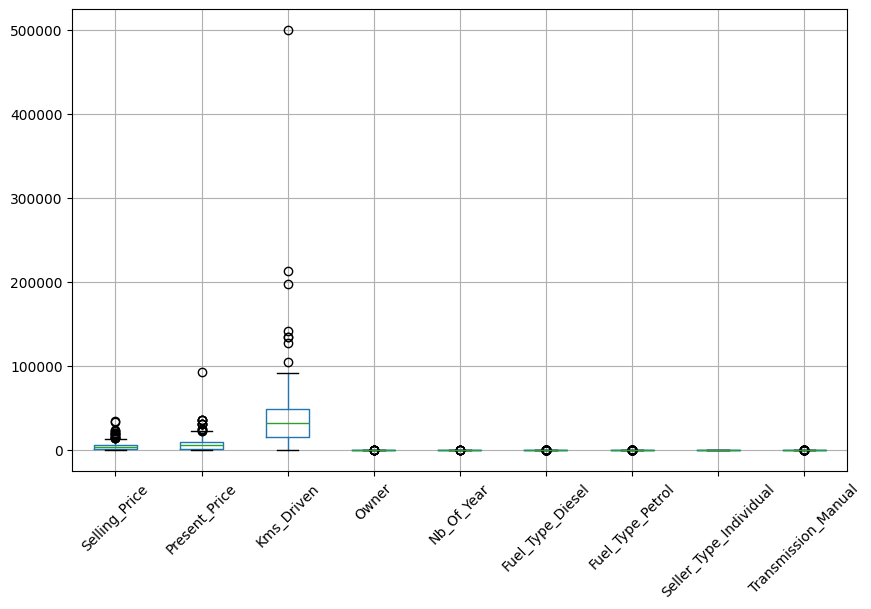

In [94]:
# visualisation des données aberrantes avec le graph boxplot
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

### Visualisation des données

#### Corrélation entre toutes les caractéristiques

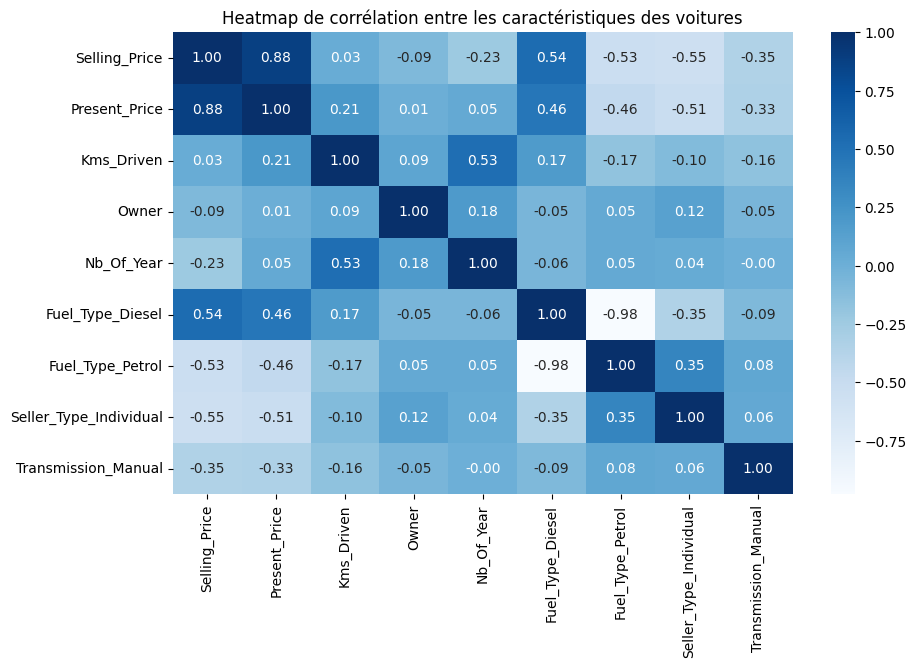

In [95]:
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap de corrélation entre les caractéristiques des voitures')
plt.show()

#### Corrélation des variables quantitatives en "Nuage de points"



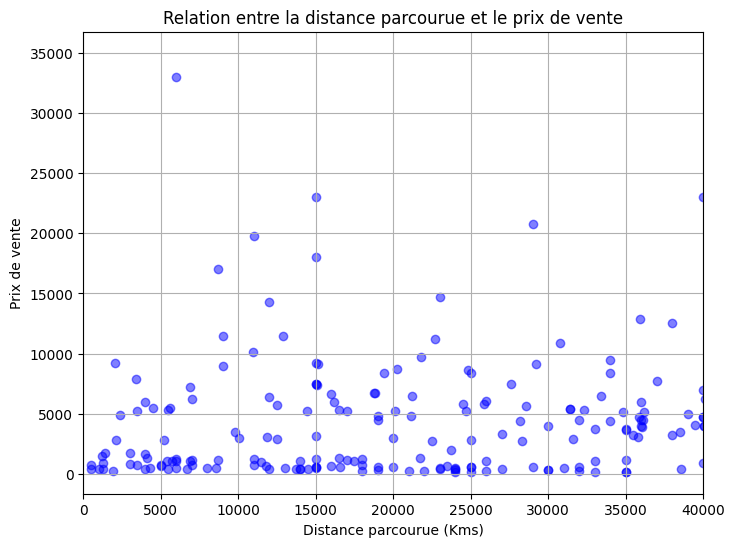

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Kms_Driven'], df['Selling_Price'], color='blue', alpha=0.5)
plt.title('Relation entre la distance parcourue et le prix de vente')
plt.xlabel('Distance parcourue (Kms)')
plt.ylabel('Prix de vente')
plt.grid(True)
plt.xlim(0, 40000)
plt.show()

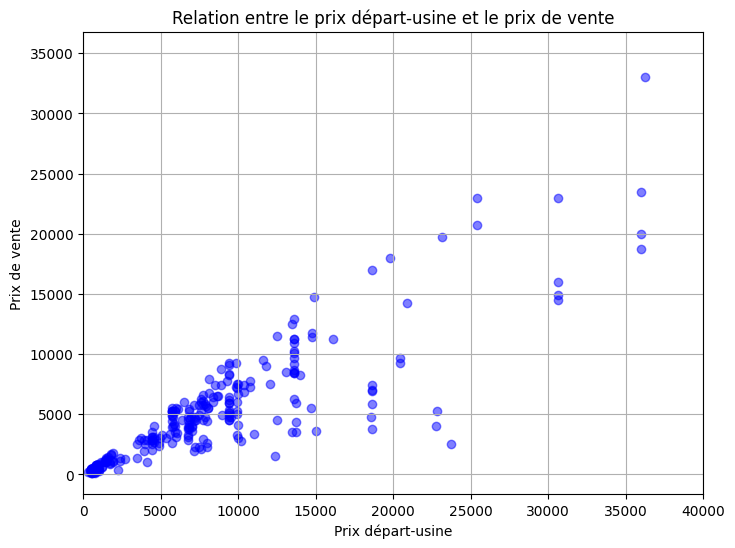

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], color='blue', alpha=0.5)
plt.title('Relation entre le prix départ-usine et le prix de vente')
plt.xlabel('Prix départ-usine')
plt.ylabel('Prix de vente')
plt.grid(True)
plt.xlim(0, 40000)
plt.show()

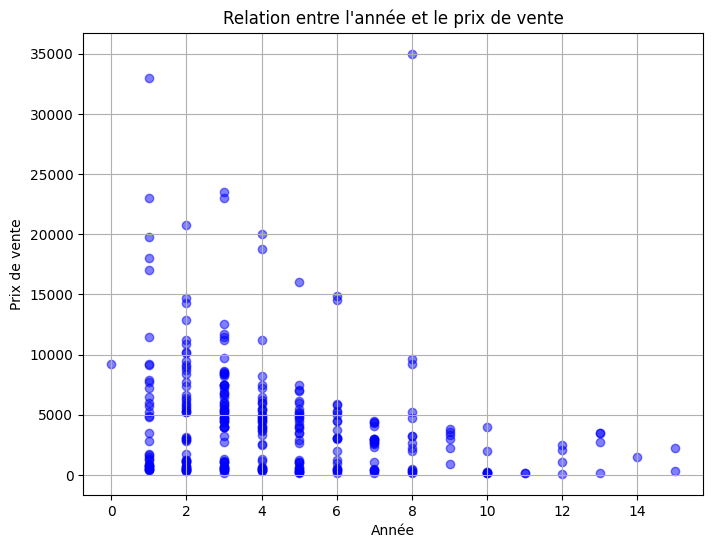

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Nb_Of_Year'], df['Selling_Price'], color='blue', alpha=0.5)
plt.title("Relation entre l'année et le prix de vente")
plt.xlabel('Année')
plt.ylabel('Prix de vente')
plt.grid(True)
plt.show()

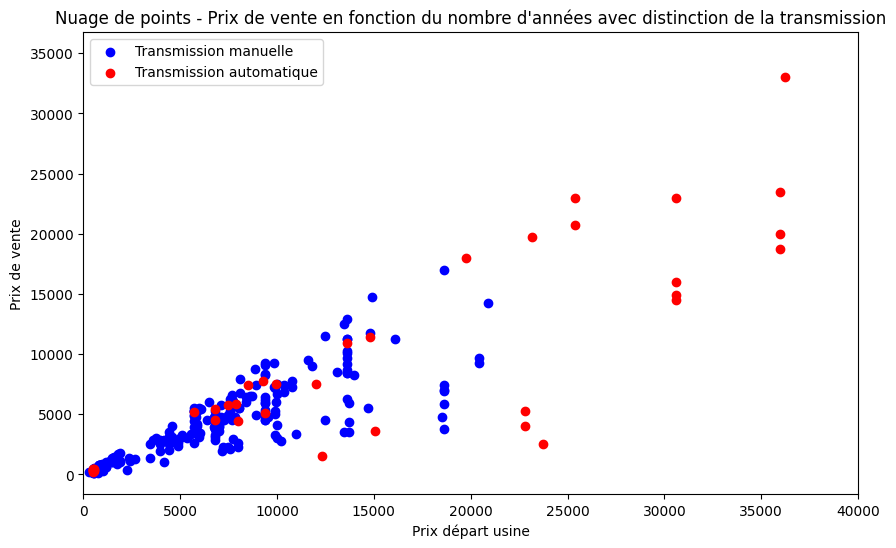

In [99]:
manual_transmission = df[df['Transmission_Manual'] == 1]
automatic_transmission = df[df['Transmission_Manual'] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(manual_transmission['Present_Price'], manual_transmission['Selling_Price'], color='blue', label='Transmission manuelle')
plt.scatter(automatic_transmission['Present_Price'], automatic_transmission['Selling_Price'], color='red', label='Transmission automatique')

plt.xlabel('Prix départ usine')
plt.ylabel('Prix de vente')
plt.title('Nuage de points - Prix de vente en fonction du nombre d\'années avec distinction de la transmission')
plt.legend()

plt.xlim(0, 40000)

plt.show()

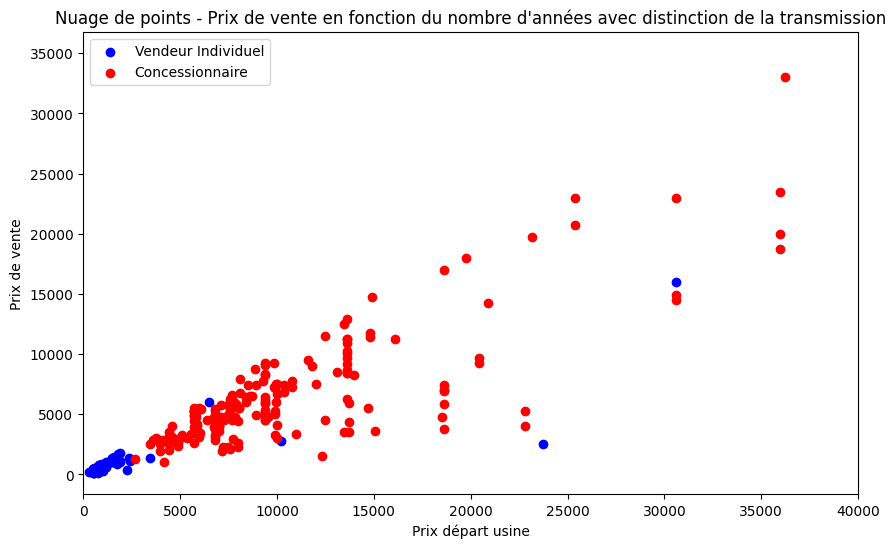

In [100]:
Seller_Type_Individual = df[df['Seller_Type_Individual'] == 1]
Seller_Type_Dealer = df[df['Seller_Type_Individual'] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(Seller_Type_Individual['Present_Price'], Seller_Type_Individual['Selling_Price'], color='blue', label='Vendeur Individuel')
plt.scatter(Seller_Type_Dealer['Present_Price'], Seller_Type_Dealer['Selling_Price'], color='red', label='Concessionnaire')

plt.xlabel('Prix départ usine')
plt.ylabel('Prix de vente')
plt.title('Nuage de points - Prix de vente en fonction du nombre d\'années avec distinction de la transmission')
plt.legend()

plt.xlim(0, 40000)

plt.show()

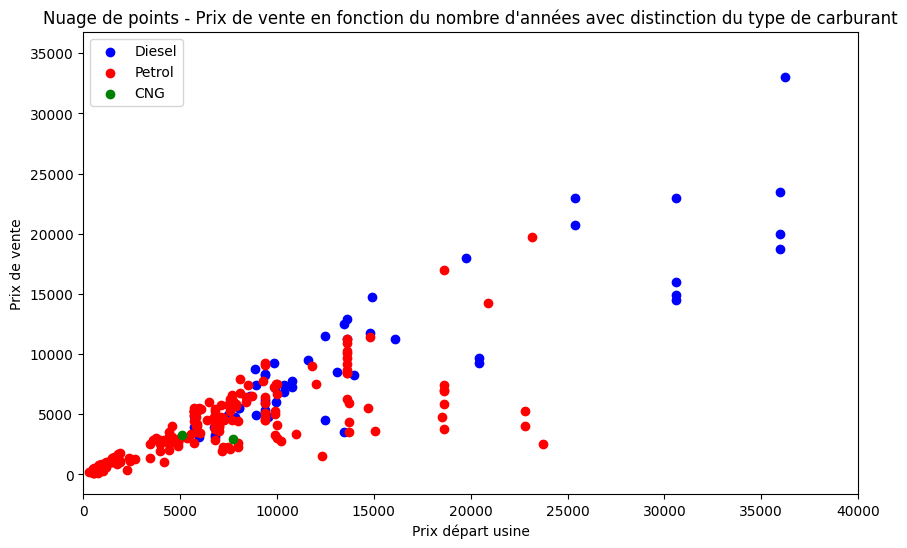

In [101]:
df['Fuel_Type'] = 'CNG'
df.loc[df['Fuel_Type_Diesel'] == 1, 'Fuel_Type'] = 'Diesel'
df.loc[df['Fuel_Type_Petrol'] == 1, 'Fuel_Type'] = 'Petrol'

plt.figure(figsize=(10, 6))

colors = {'Diesel': 'blue', 'Petrol': 'red', 'CNG': 'green'}

for fuel_type, color in colors.items():
    subset = df[df['Fuel_Type'] == fuel_type]
    plt.scatter(subset['Present_Price'], subset['Selling_Price'], color=color, label=fuel_type)

plt.xlabel('Prix départ usine')
plt.ylabel('Prix de vente')
plt.title('Nuage de points - Prix de vente en fonction du nombre d\'années avec distinction du type de carburant')
plt.legend()

plt.xlim(0, 40000)

plt.show()

#### Visualisation des données avec les types de tracés "catplot"

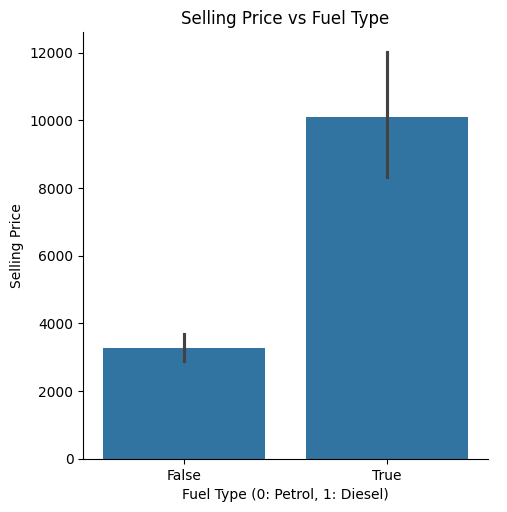

In [102]:
sns.catplot(x="Fuel_Type_Diesel", y="Selling_Price", kind="bar", data=df)
plt.title("Selling Price vs Fuel Type")
plt.xlabel("Fuel Type (0: Petrol, 1: Diesel)")
plt.ylabel("Selling Price")
plt.show()

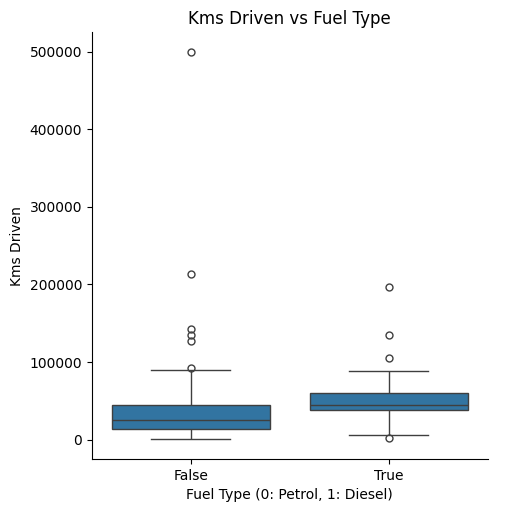

In [103]:
sns.catplot(x="Fuel_Type_Diesel", y="Kms_Driven", kind="box", data=df)
plt.title("Kms Driven vs Fuel Type")
plt.xlabel("Fuel Type (0: Petrol, 1: Diesel)")
plt.ylabel("Kms Driven")
plt.show()

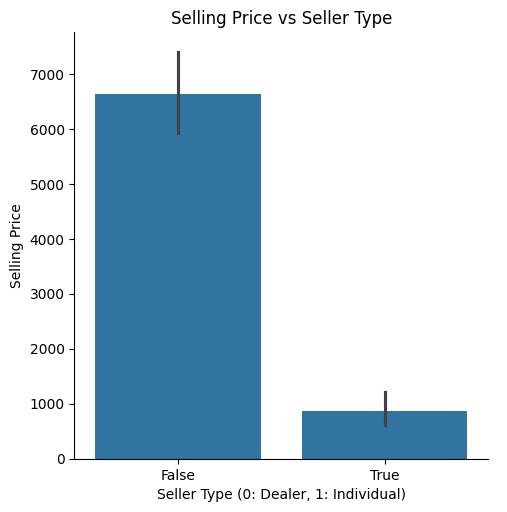

In [104]:
sns.catplot(x="Seller_Type_Individual", y="Selling_Price", kind="bar", data=df)
plt.title("Selling Price vs Seller Type")
plt.xlabel("Seller Type (0: Dealer, 1: Individual)")
plt.ylabel("Selling Price")
plt.show()

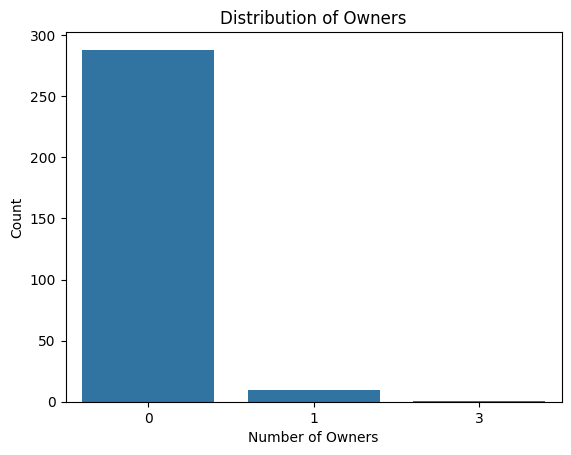

In [105]:
sns.countplot(x="Owner", data=df)
plt.title("Distribution of Owners")
plt.xlabel("Number of Owners")
plt.ylabel("Count")
plt.show()

Dans quel cas le type de tracé catplot est
pertinent ?

Les tracés catplot sont utiles lorsqu'on veut explorer la relation entre des variables catégorielles et numériques, visualiser des distributions dans différentes catégories, comparer plusieurs groupes ou classes, ou simplement afficher les fréquences des catégories.

## Prédiction du prix de vente avec la régression linéaire

### Veille régression linéaire

Quantifier la relation entre l'âge et le prix de vente.

Est-ce que notre jeux de données est adapté
à ce type d'algorithme ?

Ou existe-t-il une corrélation linéaire
(corrélation de Pearson) entre les variables ?

Proposez un outil de visualisation de Matplotlib permettant d'appuyer notre argumentation.

### Premier algorithme de régression linéaire avec la librairie Scikit_learn

### Second algorithme de régression linéaire avec la librairie Scipy